In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [43]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [45]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [47]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [49]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. 7662 rows, 4 columns, floats, integers, objects

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [53]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [55]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

#created a rename dictionary

In [57]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [60]:
# assuming that this question is referring to countries having data for all possible years in thedata set... 
# table where we pulled is showing 33 years - is there another way for me to get that using python?

In [62]:
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [64]:
gdp_df['Year'].value_counts(ascending=True)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: count, dtype: int64

In [66]:
# shows us definitely that not all countries are represented across all years.. now need to count the number of years 
# notice from this that the earlier in the records, the fewer countries are represented.
# all 242 countries repesented frrom 2019 forward

In [68]:
gdp_df['Year'].nunique()

33

In [70]:
# 33 years represented in the data

In [72]:
gdp_df['Country'].nunique()

242

In [74]:
# 242 unique countries represented 

In [76]:
country_count = gdp_df['Country'].value_counts().reset_index()
print(country_count)

                                          Country  count
0    Least developed countries: UN classification     33
1                      Middle East & North Africa     33
2         Middle East & North Africa (IDA & IBRD)     33
3                                   Middle income     33
4                                        Mongolia     33
..                                            ...    ...
237                                        Kosovo     15
238                     Sint Maarten (Dutch part)     14
239                      Turks and Caicos Islands     12
240                                       Somalia     10
241                                      Djibouti     10

[242 rows x 2 columns]


In [78]:
country_count.loc[country_count['count'] == 33].count()

Country    202
count      202
dtype: int64

In [80]:
# using the .loc to find within the new dataframe country_count WHERE the count is 33 exactly, then counting those rows 

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [83]:
# create a new dataframe
# ask Rob: why do we need to refer to the df twice here? 
# 'go find this df, then again within that df find this column'
year_2020 = gdp_df[gdp_df['Year'] == 2020]
year_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [85]:
# histogram
# note to self: go in and tinker with this, consider using seaborn 

<function matplotlib.pyplot.show(close=None, block=None)>

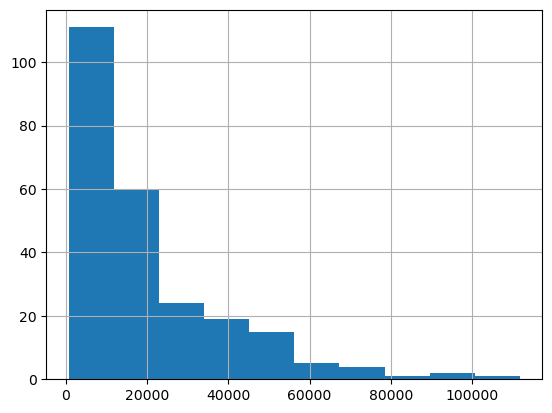

In [87]:
year_2020['GDP_Per_Capita'].hist()
plt.show

In [89]:
# how to show only the year 2020?

In [91]:
# density plot

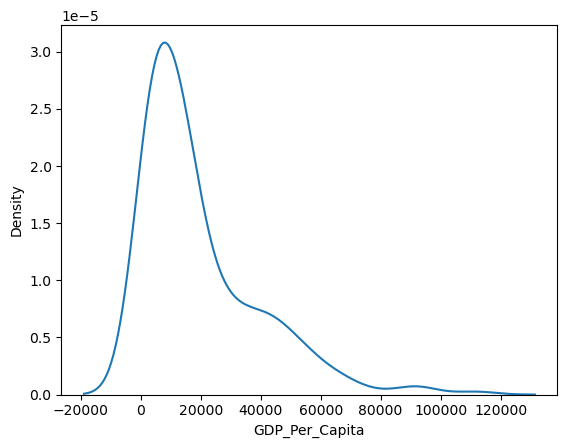

In [93]:
sns.kdeplot(year_2020['GDP_Per_Capita'])
plt.show()

In [95]:
# boxplot

<Axes: xlabel='GDP_Per_Capita'>

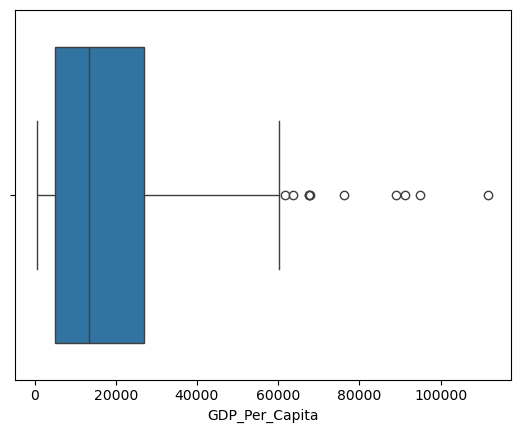

In [97]:
sns.boxplot(x=year_2020['GDP_Per_Capita'])

In [99]:
# violin plot

<Axes: ylabel='GDP_Per_Capita'>

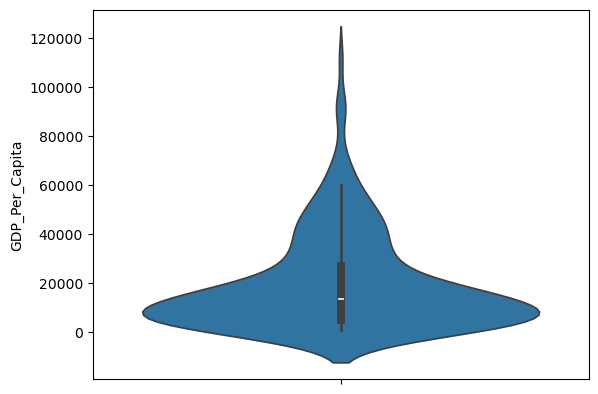

In [101]:
sns.violinplot(y=year_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [104]:
year_2020['GDP_Per_Capita'].median()

13357.997573370474

In [106]:
gdp_df.groupby('Year')['GDP_Per_Capita'].median()

Year
1990     6223.452994
1991     6360.469210
1992     6209.463742
1993     6091.534418
1994     6171.059251
1995     6749.160113
1996     7174.626665
1997     7297.913083
1998     7555.550529
1999     7806.963355
2000     8702.082651
2001     8558.693172
2002     8589.283867
2003     8773.138530
2004     9121.561850
2005     9339.682864
2006     9781.776711
2007    10335.725131
2008    10676.921724
2009    10824.576362
2010    11281.255733
2011    11589.092436
2012    11595.746506
2013    11773.506476
2014    12164.228037
2015    12488.889566
2016    12982.180440
2017    13578.816959
2018    13926.312625
2019    14250.395900
2020    13357.997573
2021    13754.802423
2022    14370.649102
Name: GDP_Per_Capita, dtype: float64

In [108]:
# used a groupby here since I wasn't sure at first how to get 2020

In [110]:
# can we do something like this?

gdp_df[gdp_df['Year'] == 2020].median(gdp_df['GDP_Per_Capita'])

TypeError: unhashable type: 'Series'

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [113]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [115]:
type(gdp_decades)

pandas.core.frame.DataFrame

11. Which country was the first to have a GDP per capita greater than $100,000?

In [120]:
greater_GDP = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
greater_GDP_sorted = greater_GDP.sort_values('Year', ascending=True)
greater_GDP_sorted[['Country', 'Year', 'GDP_Per_Capita']]

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [132]:
highest_gdp = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending=False)
highest_gdp.head()

#would like to try this way too
#2020_GDP = gdp_df[gdp_df['Year'] == 2020]
#2020_GDP_max = greater_GDP.max('GDP_Per_Capita')
#2020_GDP_max[['Country', 'Year', 'GDP_Per_Capita']]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744


In [138]:
# could use the .max here to get just the Luxembourg data / create a new df, then plot that 

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [141]:
highest_gdp = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending=True)
highest_gdp.head()

#create plot later

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [144]:
internet_df = pd.read_csv(r'C:\Users\jenni\OneDrive\Desktop\DA12\Projects\Python\un-python-Jtoppins24\data\internet_use.csv', nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [146]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [149]:
internet_df = internet_df.drop('Value Footnotes', axis=1)

In [151]:
internet_df = internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [153]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [156]:
internet_df.groupby('Year')['Internet_Users_Pct'].count()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Internet_Users_Pct, dtype: int64

In [158]:
# shows how many times that year shows up in the data set - strange peak in the 2000s?

17. What is the first year to have a non-zero internet users percentage value?

In [161]:
#greater_GDP = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
#greater_GDP_sorted = greater_GDP.sort_values('Year', ascending=True)
#greater_GDP_sorted[['Country', 'Year', 'GDP_Per_Capita']]

nonzero_year = internet_df[internet_df['Internet_Users_Pct'] > 0]
nonzero_year_sorted = nonzero_year.sort_values('Year', ascending=True)
nonzero_year_sorted[['Country', 'Year', 'Internet_Users_Pct']]

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [ ]:
# what do we mean by distribution? as in the range of values within 2000 and 2014 respectively?

19. For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
below_five = internet_df[internet_df['Internet_Users_Pct'] < 5]
below_five_sorted = below_five.sort_values('Year', ascending=True)
below_five_sorted[['Country', 'Year', 'Internet_Users_Pct']]

In [ ]:
# still need to limit to 2014 and do a count of the total countries that fit this discription 

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [ ]:
pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')

In [ ]:
# unsure how to name this...

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?